In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from __future__ import division
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set()

sns.set_style('whitegrid')

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
df = pd.read_csv('cleaned_vg_df.csv' )
df.drop('Unnamed: 0', axis=1, inplace=True)


## What is the average release rate for each month? The average number of releases per year for each month. 

Rate = number of releases / total releases for that year

Average number of releases per year for that month.


$H_{o}$: November has the highest number of releases

$H_{A}$ : November does not have the highest number of releases 

### First, let's check if the number of releases per year correlates with global sales of that year. Does more game releases mean more sales?

In [3]:
# is there a correlation between the number of game releases per year and its global sales. All game titles across all platforms
#franchises are included

num_of_releases = df.groupby(['Year_of_Release_Sales'])['Name'].size()

gb_yr = df.groupby(['Year_of_Release_Sales'])['Global_Sales'].sum()

r = pd.concat([num_of_releases, gb_yr], axis=1, keys=['Number_of_Releases', 'Global_Sales'])


In [4]:
#dropping duplicates because of franchises are considered ONE game
data = df.drop_duplicates(subset='Name')

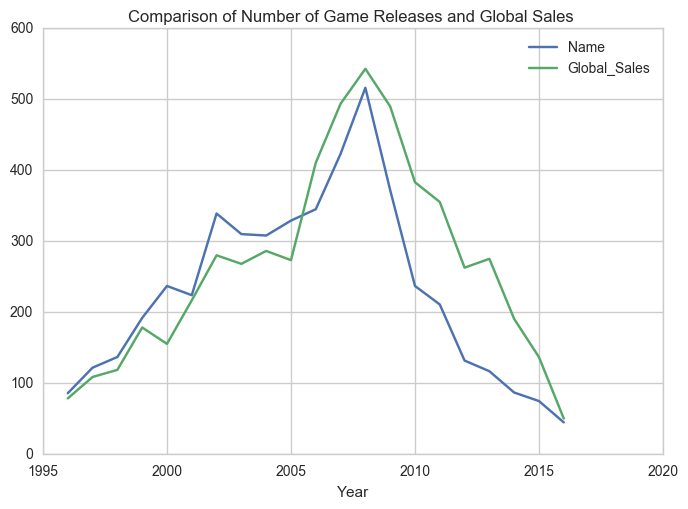

In [5]:
#total number of releases for each year
all_releases = data.groupby(['release_year'])['Name'].count()
gb_sales = df.groupby(['release_year'])['Global_Sales'].sum()
plt.plot(all_releases)
plt.plot(gb_sales)
plt.xlabel('Year')
plt.title('Comparison of Number of Game Releases and Global Sales ')
plt.legend()

In [6]:
dd = data[['release_year','Name','release_month']]


In [7]:
#total releases for that year
total = dd.groupby(['release_year']).agg('count')


In [8]:
#the number of releases for each month within that respected year
monthly_releases = dd.groupby(['release_year','release_month']).agg({'release_month':'count'})


In [9]:
#divide the number of monthly releases by the total releases of that year
num_releases = monthly_releases.div(total, level="release_year")
num_releases.index = num_releases.index.rename(names=['year','months'])


In [10]:
num_releases = num_releases.rename(columns= {'release_month': 'monthly_releases'}).drop('Name',1)

In [11]:
nn = num_releases.sort_index().unstack(1)

In [12]:
nn = nn.dropna()
nn

monthly_releases                                                    \
months               1         2         3         4         5         6    
year                                                                        
1997           0.106557  0.032787  0.057377  0.073770  0.081967  0.049180   
1998           0.065693  0.014599  0.080292  0.051095  0.036496  0.087591   
1999           0.041667  0.062500  0.062500  0.062500  0.026042  0.083333   
2000           0.063291  0.033755  0.088608  0.054852  0.054852  0.088608   
2001           0.035714  0.049107  0.075893  0.049107  0.035714  0.116071   
2002           0.047198  0.070796  0.076696  0.058997  0.026549  0.097345   
2003           0.064516  0.074194  0.106452  0.054839  0.045161  0.087097   
2004           0.029221  0.071429  0.087662  0.081169  0.045455  0.064935   
2005           0.030395  0.057751  0.118541  0.075988  0.051672  0.051672   
2006           0.040580  0.089855  0.107246  0.055072  0.057971  0.066667   
2007           0.042553  0.070922  0.075650  0.035461  0.049645  0.068558   
2008           0.050388  0.087209  0.089147  0.052326  0.042636  0.071705   
2009           0.091398  0.094086  0.112903  0.075269  0.059140  0.088710   
2010           0.050633  0.071730  0.097046  0.063291  0.071730  0.075949   
2011           0.037915  0.085308  0.132701  0.085308  0.061611  0.071090   
2012           0.030303  0.128788  0.121212  0.060606  0.090909  0.068182   
2013           0.034188  0.076923  0.128205  0.059829  0.017094  0.076923   
2014           0.011494  0.091954  0.114943  0.080460  0.068966  0.068966   
2015           0.040000  0.093333  0.080000  0.040000  0.066667  0.040000   

                                                                    
months        7         8         9         10        11        12  
year                                                                
1997    0.032787  0.065574  0.122951  0.155738  0.155738  0.065574  
1998    0.043796  0.072993  0.102190  0.175182  0.160584  0.109489  
1999    0.067708  0.078125  0.125000  0.145833  0.135417  0.109375  
2000    0.033755  0.088608  0.084388  0.164557  0.151899  0.092827  
2001    0.058036  0.044643  0.062500  0.142857  0.236607  0.093750  
2002    0.035398  0.061947  0.138643  0.159292  0.179941  0.047198  
2003    0.041935  0.070968  0.083871  0.125806  0.177419  0.067742  
2004    0.045455  0.074675  0.139610  0.139610  0.168831  0.051948  
2005    0.027356  0.072948  0.136778  0.145897  0.151976  0.079027  
2006    0.034783  0.060870  0.084058  0.144928  0.168116  0.089855  
2007    0.044917  0.078014  0.078014  0.198582  0.189125  0.068558  
2008    0.029070  0.077519  0.108527  0.125969  0.133721  0.131783  
2009    0.045699  0.034946  0.094086  0.139785  0.118280  0.045699  
2010    0.059072  0.054852  0.084388  0.156118  0.168776  0.046414  
2011    0.052133  0.056872  0.104265  0.151659  0.127962  0.033175  
2012    0.030303  0.045455  0.083333  0.159091  0.136364  0.045455  
2013    0.059829  0.085470  0.102564  0.111111  0.170940  0.076923  
2014    0.034483  0.057471  0.114943  0.160920  0.149425  0.045977  
2015    0.040000  0.093333  0.226667  0.160000  0.093333  0.026667

In [13]:
stat_df = nn.monthly_releases.describe()
stat_df

months,1,2,3,4,5,6,7,8,9,10,11,12
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.048090,0.071422,0.095425,0.061576,0.052120,0.074873,0.042974,0.067120,0.109304,0.150681,0.156550,0.069865
std,0.022467,0.026280,0.022213,0.013931,0.019321,0.017787,0.011730,0.015636,0.036129,0.019231,0.030603,0.028837
min,0.011494,0.014599,0.057377,0.035461,0.017094,0.040000,0.027356,0.034946,0.062500,0.111111,0.093333,0.026667
25%,0.034951,0.060125,0.078348,0.053582,0.039566,0.067424,0.034119,0.057172,0.084223,0.141321,0.135890,0.046195
50%,0.041667,0.071730,0.089147,0.059829,0.051672,0.071705,0.041935,0.070968,0.102564,0.151659,0.155738,0.067742
75%,0.056962,0.088532,0.113923,0.074520,0.064139,0.087344,0.048916,0.077767,0.123975,0.159646,0.169886,0.091341
max,0.106557,0.128788,0.132701,0.085308,0.090909,0.116071,0.067708,0.093333,0.226667,0.198582,0.236607,0.131783


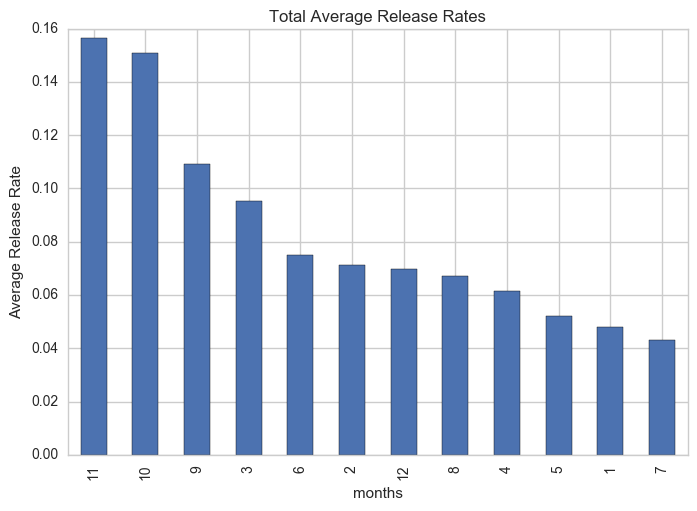

In [14]:
stat_df.loc['mean',:].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Average Release Rate')
plt.title('Total Average Release Rates')

In [15]:
nn.columns

MultiIndex(levels=[[u'monthly_releases'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           names=[None, u'months'])

In [16]:
Jan = nn.loc[:, (slice(None), 1)].values.tolist()
Feb = nn.loc[:, (slice(None), 2)].values.tolist()
Mar = nn.loc[:, (slice(None), 3)].values.tolist()
Apr = nn.loc[:, (slice(None), 4)].values.tolist()
May = nn.loc[:, (slice(None), 5)].values.tolist()
Jun = nn.loc[:, (slice(None), 6)].values.tolist()
Jul = nn.loc[:, (slice(None), 7)].values.tolist()
Aug = nn.loc[:, (slice(None), 8)].values.tolist()
Sep = nn.loc[:, (slice(None), 9)].values.tolist()
Oct = nn.loc[:, (slice(None), 10)].values.tolist()
Nov = nn.loc[:, (slice(None), 11)].values.tolist()
Dec = nn.loc[:, (slice(None), 12)].values.tolist()

In [17]:
stats.f_oneway(Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec )


F_onewayResult(statistic=array([ 50.84125138]), pvalue=array([  8.13439574e-54]))

In [18]:
nn_long = pd.DataFrame(nn.unstack())
nn_long = nn_long.reset_index()
nn_long = nn_long.drop('level_0', axis=1)
nn_long.columns = ['monthly_releases', 'year', 'release_rate']
nn_long['monthly_releases'] = nn_long['monthly_releases'].astype('str')
nn_long.head()

,monthly_releases,year,release_rate
0,1,1997,0.106557
1,1,1998,0.065693
2,1,1999,0.041667
3,1,2000,0.063291
4,1,2001,0.035714


In [19]:
nn_long.groupby('monthly_releases')['release_rate'].mean()

monthly_releases
1     0.048090
10    0.150681
11    0.156550
12    0.069865
2     0.071422
3     0.095425
4     0.061576
5     0.052120
6     0.074873
7     0.042974
8     0.067120
9     0.109304
Name: release_rate, dtype: float64

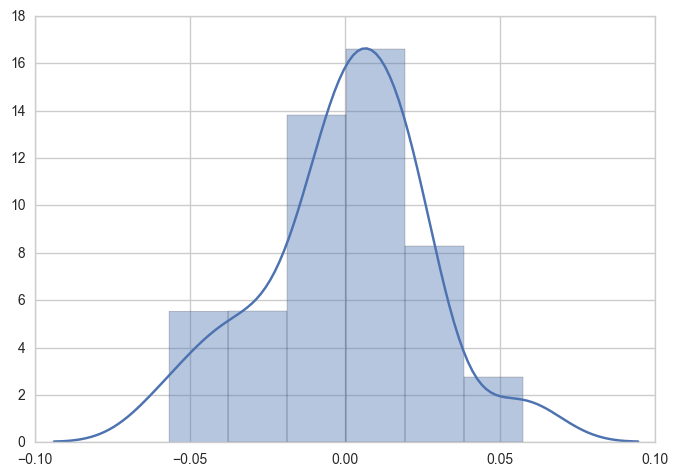

In [20]:
Jan = nn.loc[:, (slice(None), 1)].values.tolist()
sns.distplot((Feb - np.mean(Feb)))

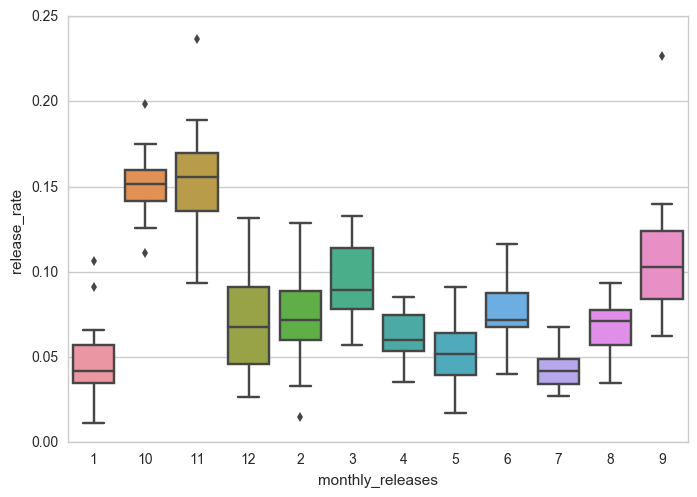

In [21]:
sns.boxplot(x='monthly_releases',y='release_rate', data=nn_long)

In [22]:
tukey = pairwise_tukeyhsd(endog=nn_long.release_rate, groups=nn_long.monthly_releases)

tukey.summary()


group1,group2,meandiff,lower,upper,reject
1,10,0.1026,0.0778,0.1273,True
1,11,0.1085,0.0837,0.1332,True
1,12,0.0218,-0.003,0.0465,False
1,2,0.0233,-0.0014,0.0481,False
1,3,0.0473,0.0226,0.0721,True
1,4,0.0135,-0.0113,0.0382,False
1,5,0.004,-0.0207,0.0288,False
1,6,0.0268,0.002,0.0515,True
1,7,-0.0051,-0.0299,0.0196,False
1,8,0.019,-0.0057,0.0438,False


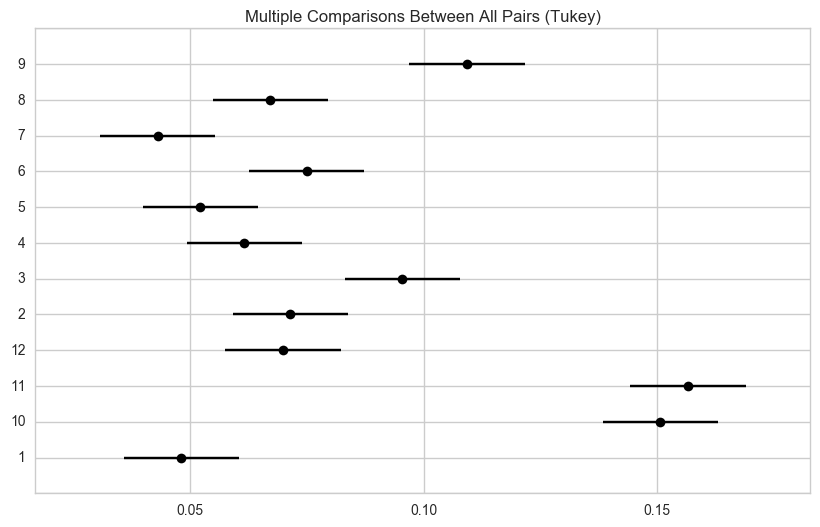

In [23]:
tukey_plot = tukey.plot_simultaneous()

In [24]:
stat_df.index

Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')

In [25]:
months = [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]

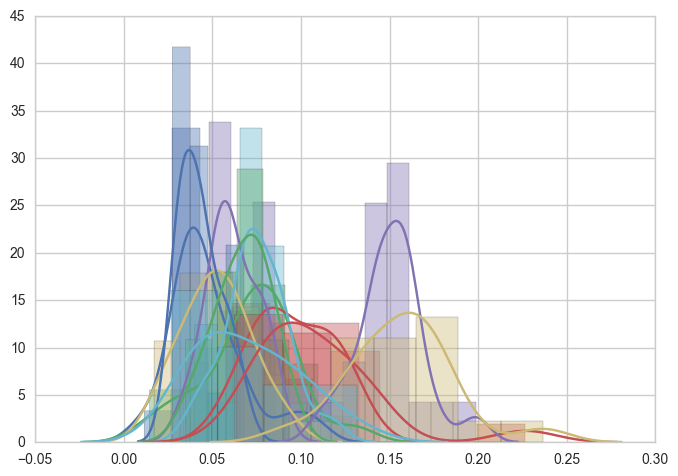

In [26]:
sns.distplot(Jan)
sns.distplot(Feb)
sns.distplot(Mar)
sns.distplot(Apr)
sns.distplot(May)
sns.distplot(Jun)
sns.distplot(Jul)
sns.distplot(Aug)
sns.distplot(Sep)
sns.distplot(Oct)
sns.distplot(Nov)
sns.distplot(Dec)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c4104d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d2b3c10>]], dtype=object)

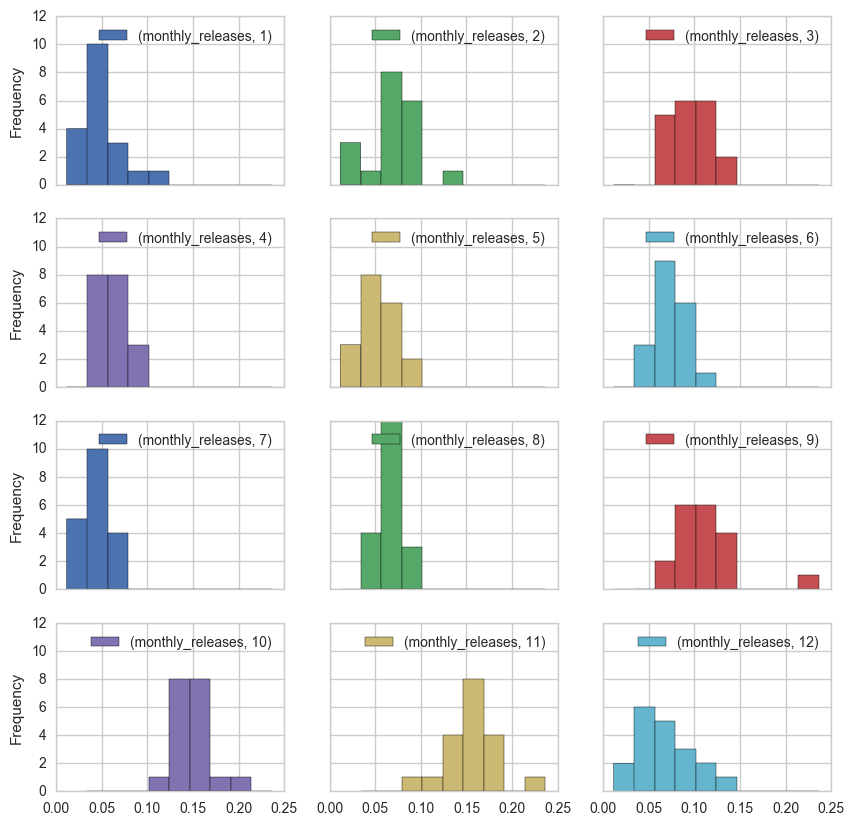

In [27]:
nn.plot(kind='hist',subplots=True, layout=(4,3),figsize=(10,10), sharey=True)



Since the groups in the data do not have the same standard deviation and does not follow a normal distributino, the the Median Test is used. 

$H_{o}$: The median release rate for the groups are the same.

$H_{A}$ : The median release rate for the groups are not the same. 


In [28]:
Jan = list(nn.loc[:, (slice(None), 1)].values.flat)
Feb = list(nn.loc[:, (slice(None), 2)].values.flat)
Mar = list(nn.loc[:, (slice(None), 3)].values.flat)
Apr = list(nn.loc[:, (slice(None), 3)].values.flat)
May = list(nn.loc[:, (slice(None), 5)].values.flat)
Jun = list(nn.loc[:, (slice(None), 6)].values.flat)
Jul = list(nn.loc[:, (slice(None), 7)].values.flat)
Aug = list(nn.loc[:, (slice(None), 8)].values.flat)
Sep = list(nn.loc[:, (slice(None), 9)].values.flat)
Oct = list(nn.loc[:, (slice(None), 10)].values.flat)
Nov = list(nn.loc[:, (slice(None), 11)].values.flat)
Dec = list(nn.loc[:, (slice(None), 12)].values.flat)

In [29]:
med_test = stats.median_test(Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec)
stat_med, p , grand_median, table  = med_test
med_test

(112.63157894736844,
 5.455214246931901e-19,
 0.077766782121062181,
 array([[ 2,  7, 14, 14,  2,  7,  0,  5, 18, 19, 19,  7],
        [17, 12,  5,  5, 17, 12, 19, 14,  1,  0,  0, 12]]))

In [30]:
stats.kruskal(Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec)

KruskalResult(statistic=154.10702139676008, pvalue=2.1555988993222639e-27)

/Users/macbook/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=2.3607903326881017, pvalue=0.30715733637401066)

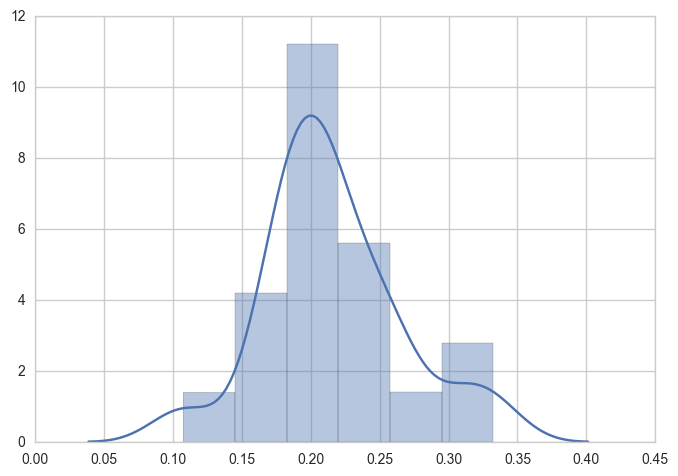

In [31]:
j = []
for values in Jan:
    val = math.asin(np.sqrt(values))
    j.append(val)
sns.distplot(j)

stats.normaltest(j)

In [32]:
stat_df.loc['std'].max() / stat_df.loc['std'].min()

3.0799598929477217